# "Распознавание последовательностей"



## **Цель работы:**

Получить практические навыки обработки текстовой информации с помощью рекуррентных искусственных нейронных сетей при решении задачи определения тональности текста

## **Выполнение**

1. В среде Google Collab создать новый блокнот. Настроить блокнот для работы с аппаратным ускорителем GPU.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
 raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2. Загрузить набор данных IMDb, содежавший оцифрованные отзывы на фильмы, размеченные на два класса: позитивные и негативные. При загрузке налора данных параметр seed выбрать равным равным (4k-1 = 3), где k - порядковый номер студента по журналу. Вывести размеры полученных обучоющих и тестовых массивом данных.

In [ ]:
# загрузка датасета
from keras.datasets import imdb
vocabulary_size = 5000
index_from = 3
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz", num_words = vocabulary_size, skip_top = 0, maxlen = None, seed = 3, start_char = 1, oov_char = 2, index_from = index_from)
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


3. Вывести один отзыв из обучающего множества в виде списка индексов слов. Преобразовать список индексов в текст и вывести отзыв в виде текста. Вывести длину отзыва. Вывести метку класса данного отзыва и название класса (1 - Posistive, 0 - Negative)

In [ ]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}
review_as_text = ' '.join(id_to_word[id] for id in X_train[3])

print('Отзыв в виде списка индексов: ', X_train[3])
print('Отзыв в виде текста: ',review_as_text)
print('Длина отзыва: ',len(X_train[3]))

if y_train[3] == 1:
  class_label = 'Positive'
else:
  class_label = 'Negative'
print('Значение метки класса отзыва: {} ({}) '.format(y_train[3], class_label))

Отзыв в виде списка индексов:  [1, 12, 16, 6, 2, 221, 585, 18, 49, 282, 4, 833, 3749, 330, 7, 4, 3646, 1117, 69, 115, 77, 4, 1375, 822, 11, 6, 20, 4, 4512, 13, 70, 104, 7, 17, 108, 19, 2, 11, 98, 26, 2, 18, 2, 121, 40, 6, 2, 1233, 2, 2714, 4, 87, 132, 9, 557, 2, 6, 213, 23, 6, 1878, 2, 123, 38, 15, 2, 2, 9, 2085, 8, 28, 348, 4, 2296, 1527, 103, 32, 5, 11, 2, 121, 4, 87, 2060, 9, 31, 7, 6, 2520, 971, 2, 5, 3368, 37, 26, 2, 19, 2, 34, 4, 1019, 3780, 23, 3247, 49, 3869, 7, 2, 12, 9, 2878, 15, 11, 148, 107, 2936, 5, 11, 2, 75, 26, 1951, 19, 1290, 38, 230, 1337, 47, 805, 8, 81, 6, 622, 22, 44, 4, 113, 7, 2, 40, 308, 2, 589, 8, 81, 31, 23, 2, 19, 2, 4242, 13, 482, 12, 9, 43, 99, 254, 8, 79, 4, 182, 7, 2, 2, 42, 4, 3908, 7, 2, 2, 1845, 2604, 83, 1127, 807, 21, 95, 64, 289, 153, 596, 2609, 2, 5, 1368, 2, 122, 6, 307, 330, 279, 1337, 66, 47, 805, 10, 10, 2, 103, 487, 14, 13, 2032, 4, 1112, 212, 185, 2, 19, 2, 622, 44, 747, 153, 596, 21, 15, 9, 35, 1401, 5, 12, 16, 6, 2838, 10, 10, 4, 85, 866, 1

4. Вывести максимальную и минимальную длину отзыва в обучающем множестве.

In [ ]:
print('Максимальная длина отзыва: ', len(max(X_train , key=len)))
print('Минимальная длина отзыва: ', len(min(X_train , key=len)))

Максимальная длина отзыва:  2494
Минимальная длина отзыва:  11


5. Провести предобработку данных. Выбрать единую длину, к которой будут приведены все отзывы. Короткие отзывы дополнить спецсимволами, а длинные обрезать до выбранной длины.

In [ ]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

6. Повторить пункт 4.

In [ ]:
print('Максимальная длина отзыва: ', len(max(X_train , key=len)))
print('Минимальная длина отзыва: ', len(min(X_train , key=len)))

Максимальная длина отзыва:  500
Минимальная длина отзыва:  500


7. Повторить пункт 3. Сделать вывод о том, как преобразовался отзыв после предобработки.

In [ ]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}
review_as_text = ' '.join(id_to_word[id] for id in X_train[3])

print('Отзыв в виде списка индексов: ', X_train[3])
print('Отзыв в виде текста: ',review_as_text)
print('Длина отзыва: ',len(X_train[3]))

if y_train[3] == 1:
  class_label = 'Positive'
else:
  class_label = 'Negative'
print('Значение метки класса отзыва: {} ({}) '.format(y_train[3], class_label))

Отзыв в виде списка индексов:  [   1   12   16    6    2  221  585   18   49  282    4  833 3749  330
    7    4 3646 1117   69  115   77    4 1375  822   11    6   20    4
 4512   13   70  104    7   17  108   19    2   11   98   26    2   18
    2  121   40    6    2 1233    2 2714    4   87  132    9  557    2
    6  213   23    6 1878    2  123   38   15    2    2    9 2085    8
   28  348    4 2296 1527  103   32    5   11    2  121    4   87 2060
    9   31    7    6 2520  971    2    5 3368   37   26    2   19    2
   34    4 1019 3780   23 3247   49 3869    7    2   12    9 2878   15
   11  148  107 2936    5   11    2   75   26 1951   19 1290   38  230
 1337   47  805    8   81    6  622   22   44    4  113    7    2   40
  308    2  589    8   81   31   23    2   19    2 4242   13  482   12
    9   43   99  254    8   79    4  182    7    2    2   42    4 3908
    7    2    2 1845 2604   83 1127  807   21   95   64  289  153  596
 2609    2    5 1368    2  122    6  307  330 

**Вывод:** отзыв длиной 560 был обрезан до 500 для соблюдения единого размера всех отзывов.

8. Вывести предобработанные массивы обучающих и тестовых данных и их размерности.  

In [ ]:
print('X train:', X_train)
print('Shape of X train:', X_train.shape)
print('X test:', X_test)
print('Shape of X test:', X_test.shape)

X train: [[   0    0    0 ...   12   38   76]
 [   0    0    0 ...   33    4  130]
 [   0    0    0 ...  437    7   58]
 ...
 [   0    0    0 ... 1874 1553  422]
 [   0    0    0 ...   18 1552  234]
 [   0    0    0 ...    7   87 1090]]
Shape of X train: (25000, 500)
X test: [[   0    0    0 ...    6  194  717]
 [   0    0    0 ...   30   87  292]
 [   0    0    0 ...  495   55   73]
 ...
 [   0    0    0 ...    7   12  908]
 [   0    0    0 ...   61  477 2302]
 [   0    0    0 ...    5   68 4580]]
Shape of X test: (25000, 500)


9. Реализовать модель рекуррентной нейронной сети, состоящей из слоев Embedding, LSTM, Dropout, Dense, и обучить ее на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывести информацию об архитектуре нейронной сети. Добиться качества обучения по метрике accuracy не менее 0.8.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

#собираем модель
model = Sequential()
model.add(Embedding(input_dim=len(word_to_id), output_dim = 25, input_length=500))
model.add(LSTM(units=72))
model.add(Dropout(rate = 0.5))
model.add(Dense(1, activation='sigmoid'))

#компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#обучаяем модель
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

#выводим архитектуру модели
print(model.summary())

Epoch 1/5
704/704 [==============================] - 24s 30ms/step - loss: 0.4937 - accuracy: 0.7541 - val_loss: 0.5674 - val_accuracy: 0.7028
Epoch 2/5
704/704 [==============================] - 17s 24ms/step - loss: 0.3504 - accuracy: 0.8533 - val_loss: 0.3368 - val_accuracy: 0.8564
Epoch 3/5
704/704 [==============================] - 17s 23ms/step - loss: 0.2635 - accuracy: 0.8975 - val_loss: 0.3445 - val_accuracy: 0.8528
Epoch 4/5
704/704 [==============================] - 15s 22ms/step - loss: 0.2450 - accuracy: 0.9060 - val_loss: 0.4477 - val_accuracy: 0.8336
Epoch 5/5
704/704 [==============================] - 18s 25ms/step - loss: 0.2276 - accuracy: 0.9123 - val_loss: 0.3285 - val_accuracy: 0.8720
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 25)           2214700   
                                                                 

10. Оценить качество обучения на тестовых данных:
*   Вывести значение метрики качетсва классификации на тестовых данных
*   Вывести отчет о качестве классификации тестовой выборки
*   Построить ROC-кривую по результату обработки тестовой выборки и вычислить площадь под ROC-кривой (AUC ROC)



In [ ]:
#значение метрики качества классификации на тестовых данных
print('\n Оцениваем данные на тестовой выборке \n')
results = model.evaluate(X_test,y_test, batch_size = 32)
print('Loss on test data::',results[0])
print('Accuracy on test data:',results[1])


 Оцениваем данные на тестовой выборке 

782/782 [==============================] - 7s 9ms/step - loss: 0.3442 - accuracy: 0.8676
Loss on test data:: 0.34422335028648376
Accuracy on test data: 0.8676400184631348


In [ ]:
#отчет о качестве классификации на тестовой выборке
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 [==============================] - 7s 9ms/step
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87     12500
    Positive       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



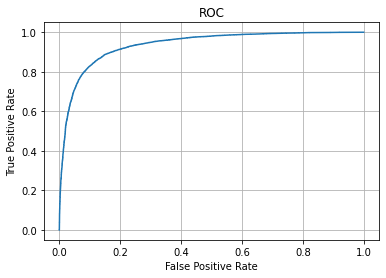

Area under ROC is 0.9361053759999999


In [ ]:
#построение ROC-кривой по результатам обработки тестовой выборки
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under ROC is', auc(fpr, tpr))

In [ ]:
#вычисление площади под ROC-кривой (AUC ROC).
from sklearn.metrics import roc_auc_score
print('AUC ROC:', roc_auc_score(y_test, y_score))

AUC ROC: 0.9361053759999999


##**Вывод:**

В результате применения рекуррентной нейронной сети для решения задачи определения тональности текста значения метрик качества precision, recall, f1-score, support и площадь под ROC-кривой оказались  достаточно близки к идеальному значению (равному 1), и для класса Positive, и для класса Negative. Невзвешенное среднее и взвешенное среднее значения этих параметров также близки к идеальным. Значение показателя accuracy составило 0.86764. Полученная рекуррентная нейронная сеть вполне пригодна для решения задачи определения тональности текста.